In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

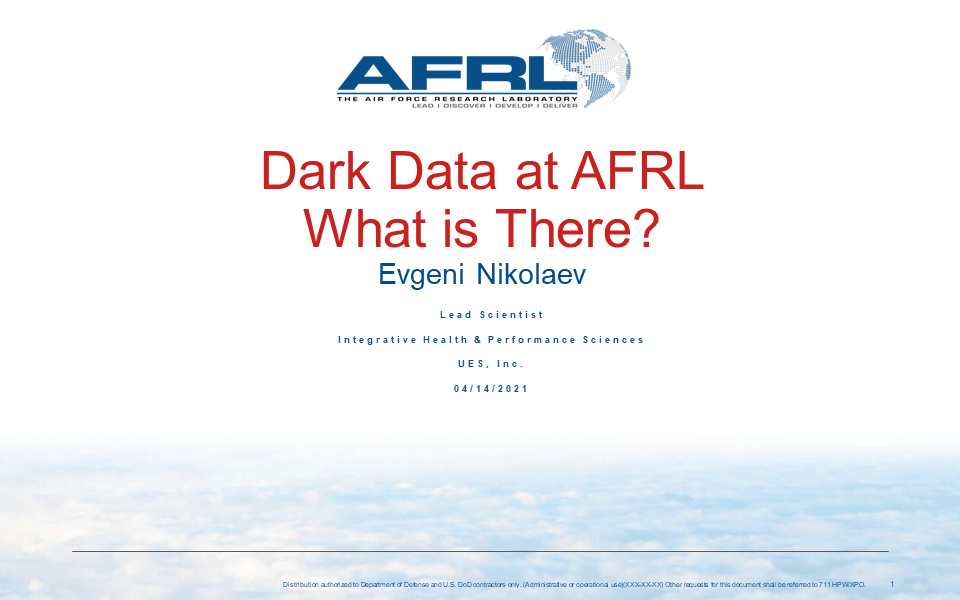

In [2]:
from IPython.display import Image
Image("front_page.png", width=1200, height=600)

# Dark Data at AFRL

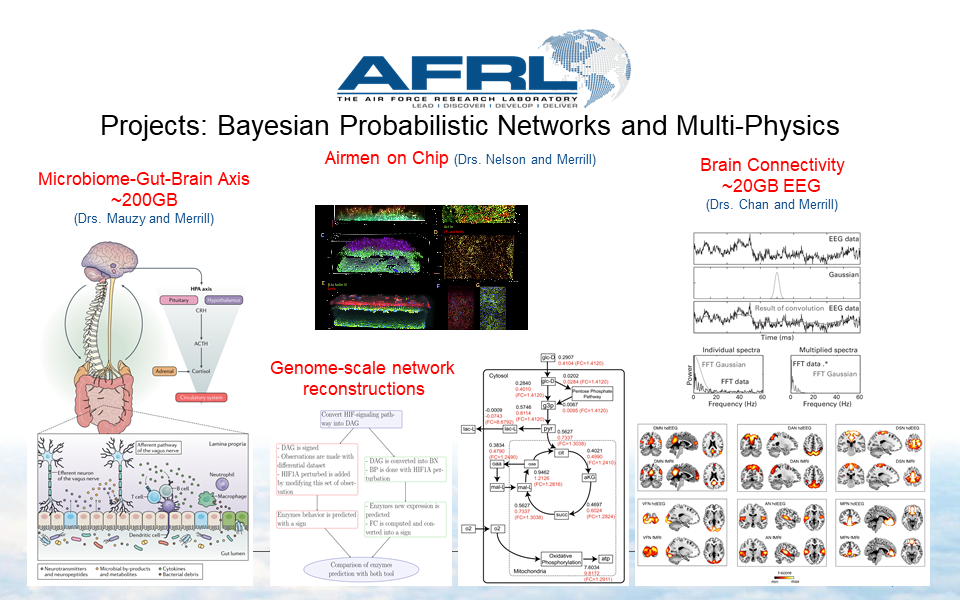

In [3]:
Image("talk_dark_data.png", width=1200, height=600)

**Figure 1: Systems Bioinformatics on Microbiome Gut-Brain Axis.** The first significant data set (~200GB) (Project #1) includes metabolomics data generated in a collaborative effort between Dr. Mauzy and Wisconsin University. The second data set (Project #2) comprises microfluidic measurements from Dr. Nelson's lab. It is the data that we need to process by developing Multiphysics Fluid Dynamics simulations. The third data set (Project #3) includes ~20GB of EEG measurements obtained in Dr. Chaen's lab. The fourth data set (Project #4) is small and is related to Synthetic Biology studies in Saldanha's lab. The final effort (Project #5) is a pure computer technology pipeline that we develop to automatically reconstruct genome-scale metabolic charts (reconstructions) from annotated genomics sequences.

# Noise Propagation on Microbiome-Gut-Brain Axis

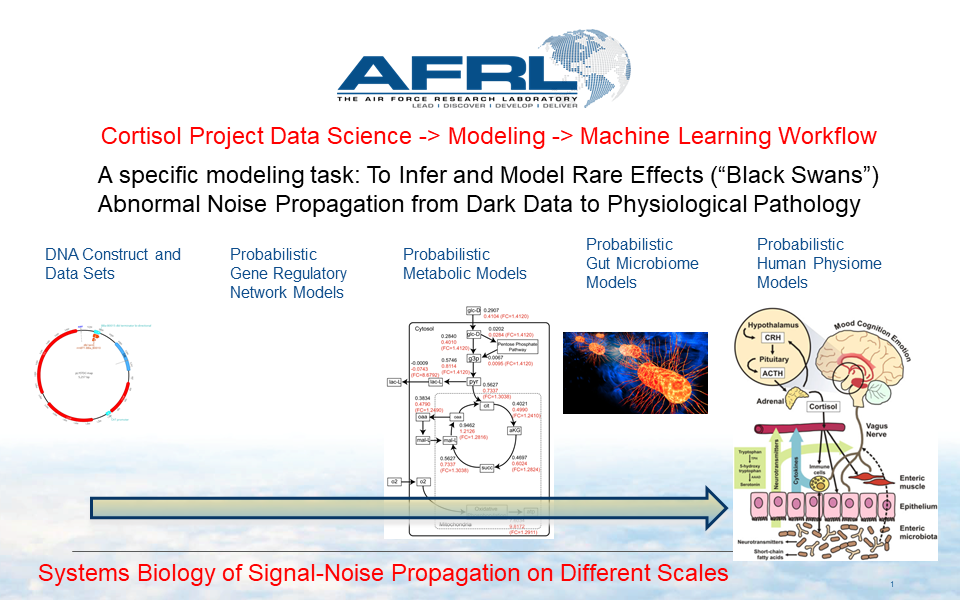

In [4]:
Image("workflow.png", width=1200, height=500)

# Risk and Volatility of Dark Data

<div class="span5 alert alert-info">
* ** Definition.** <font color='red'>**We call a formal statistical quantification of uncertainty in the data a *Dark Data Risk* or *Dark Data Risk Volatility* depending on the context.**</font>

*The above Definition is fundamental to the volatility concept in financial market research and geophysics. We plan to learn if we will adopt or extend powerful ideas from financial and geophysics risk theories to biology. Specifically, in California, geophysicists try to detect changes in the noise patterns to predict earthquakes.*

<font color='blue'>Indeed, we have already theoretically observed that the risk is tightly coupled with the biological signal:</font>

**<font color='red'>The larger the biological signal strength, the more significant risk that we have to expect in encountering unknown consequences.</font>**
</div>

# Noise Inference and Classification

The purpose of our data analysis is a quick evaluation of noise present in datasets as a ```quantitative measure``` of biological relevance. *A priori*, we expect that the total noise should be a ```mixture``` of the following three additive components:

* **Poissonian** noise corresponding to the signal from the cortisol-sensing ```tryptophan-tryptamine``` genetic circuit engineered into the DNAs of bacterial strains. The rationale here is transcription/translation processes resulting in `counts` of the reporter's mRNA and protein molecules synthesized with the corresponding rates and directly measured by the instrument.

* **Lognormal** noise coming from a myriad of intracellular processes occurring primarily in the bacterial cytoplasm. The rationale here is that myriads of intracellular reactions contribute to and maintain the TX-TL functions in a multiplicative way: one reaction's product becomes a substrate of another biochemical reaction in the corresponding pathway.

* **Normal** noise enforced by the measurement instruments and errors. The rationale here is that measurement instruments and tools are always factory-tuned around mean values leading to symmetric normal distributions of artifact noise, enforcing ```mean-value stability.```

Intuitively, the ```Poissonian``` noise should be dominant in datasets recording active transcription circuits. ```Lognormal``` noise should be dominant in datasets recording the cell states where such circuits are shut down.

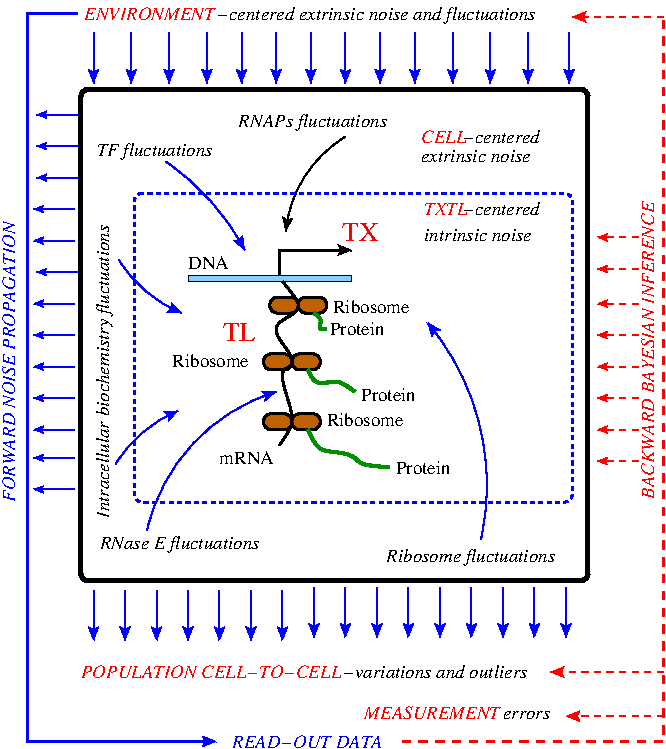

In [5]:
Image("noise_classification.png", width=450, height=450)

# Exploratory Data Analysis (EDA): Notebook's Research Objectives

Thus, the current EDA notebook aims to check the above ```three-component noise hypothesis``` and prepare for the next ML step to quantify the fractions of the three different types of noise present in the datasets. The noise fractions will help us better understand ```Dark Data``` hidden in the datasets and predict the genetic circuit's aberrant behavior should any ```Black Swans``` emerge. The impact of such ```Black Swans``` will be evaluated in additional jupyter notebooks.

## Import software libraries

In [6]:
%matplotlib inline

import math
import numpy as np                     # Work with multi-dimensional arrays and matrices
import scipy as sp                     # Perform scientific computing and advanced mathematics
import pandas as pd                    # Manipulate and analyze data
import matplotlib.pyplot as plt        # Create 2D charts
import seaborn as sns                  # Perform data visualization

import statsmodels
import statsmodels.api as sm
import statsmodels.api as smf

from pathlib import Path
from IPython.display import Image
from time import time                  # Calculate training time.

plt.style.use('ggplot')

# Summarize software libraries used.
import sys                             # Read system parameters
import os                              # Interact with the operating system
import matplotlib                      # Create 2D charts
import sklearn                         # Perform data mining and analysis
import IPython

print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- IPython {}'.format(IPython.__version__))
print('- pandas {}'.format(pd.__version__))
print('- NumPy {}'.format(np.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- SciPy {}'.format(sp.__version__))
print('- Seaborn {}'.format(sns.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))
print('- statsmodels {}'.format(statsmodels.__version__))

Libraries used in this project:
- Python 3.8.2 (default, Mar 26 2020, 15:53:00) 
[GCC 7.3.0]
- IPython 7.22.0
- pandas 1.2.3
- NumPy 1.20.2
- Matplotlib 3.4.1
- SciPy 1.6.2
- Seaborn 0.11.1
- scikit-learn 0.24.1
- statsmodels 0.12.2


__Documented working libraries used in this notebook:__
- Python 3.8.2 (default, Mar 26 2020, 15:53:00) 
[GCC 7.3.0]
- NumPy 1.20.2
- SciPy 1.6.2
- pandas 1.2.3
- Matplotlib 3.4.1
- Seaborn 0.11.1
- scikit-learn 0.24.1

## Load Data

* The two datasets generated by the in-house measurement instrument are:

    * Dataset #1. ```2019_12_19_Ecoli_sfGFP_Integrate_C11_Dose_Response_reanalysis_v1.xlsx``` 
    * Dataset #2. ```2019_12_04_Ecoli_WT_pE2Crimson_Cortisol_Dose_Response_re-analysis.xlsx```

* Description:

    * Dataset #1 corresponds to *EcN* $tolC^{-}$
    * Dateset #2 corresponds to *EcN WT*

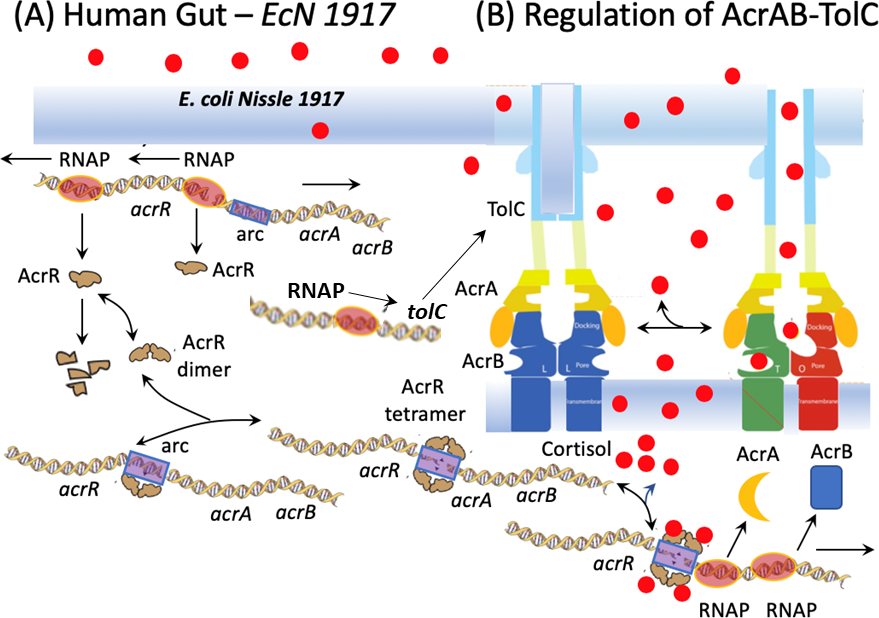

In [7]:
Image("talk_TXTL_ARC_AB_trimmed.png")

In [8]:
# Load the dataset.
PROJECT_ROOT_DIR = "."
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "data")
print('Data files in this project:', os.listdir(DATA_PATH))

fname_mt = '2019_12_19_Ecoli_sfGFP_Integrate_C11_Dose_Response_reanalysis_v1.xlsx'
fname_wt = '2019_12_04_Ecoli_pE2Crimson_WT_Cortisol_Dose_Response_re-analysis.xlsx'

data_mt_file = os.path.join(DATA_PATH, fname_mt)
data_wt_file = os.path.join(DATA_PATH, fname_wt)

df_mt_raw = pd.read_excel(data_mt_file)
df_wt_raw = pd.read_excel(data_wt_file)

print('Loaded {} records from {}.'.format(len(df_mt_raw), data_mt_file))
print('Loaded {} records from {}.'.format(len(df_wt_raw), data_wt_file))

Data files in this project: ['2019_12_04_Ecoli_pE2Crimson_WT_Cortisol_Dose_Response_re-analysis.xlsx', '2019_12_19_Ecoli_sfGFP_Integrate_C11_Dose_Response_reanalysis_v1.xlsx']
Loaded 848 records from ./data/2019_12_19_Ecoli_sfGFP_Integrate_C11_Dose_Response_reanalysis_v1.xlsx.
Loaded 622 records from ./data/2019_12_04_Ecoli_pE2Crimson_WT_Cortisol_Dose_Response_re-analysis.xlsx.


In [9]:
df_mt_raw.head(20)

,Experiment Name,Ecoli sfGFP Integrate C11 Dose Response 2019 1219,Unnamed: 2,Unnamed: 3,Unnamed: 4,? Time Point =,what is this --->,Analysis of GFP+ cells,1,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,3,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,Specimen Name,Controls,NaN,NaN,NaN,The meaning of,the other file,2.000000e+06,GFP+,95937,...,98061.0,98.3,4467.00,1239.00,NaN,GFP+,97173.0,97.4,3964.0,1152.0
1,Tube Name,Neg Ctrl 2mM,NaN,NaN,NaN,Meadian,does not have,1.000000e+06,GFP+,95834,...,98462.0,98.6,4058.00,1014.00,NaN,GFP+,98217.0,98.4,3930.0,1043.0
2,Record Date,2019-12-19 15:27:00,NaN,NaN,NaN,SD,any analysis,5.000000e+05,GFP+,93213,...,98225.0,98.3,3817.00,1021.00,NaN,GFP+,98410.0,98.5,4412.0,1185.0
3,$OP,Becky,NaN,NaN,NaN,NaN,<--- what is,2.500000e+05,GFP+,94794,...,98255.0,98.4,4145.00,1080.00,NaN,GFP+,96823.0,97.0,3581.0,1031.0
4,$BTIM,15:27:33,NaN,NaN,NaN,NaN,the difference,1.250000e+05,GFP+,94382,...,97373.0,97.5,3539.00,1093.00,NaN,GFP+,96605.0,96.8,3380.0,1023.0
5,Date Analyzed,2020-01-03 16:03:00,NaN,NaN,NaN,NaN,<--- between these,6.250000e+04,GFP+,88527,...,96984.0,97.2,3116.00,1069.00,NaN,GFP+,96276.0,96.5,3342.0,1026.0
6,Population,#Events,%Parent,GFP 525/50 Blue-A Median,GFP 525/50 Blue-A rSD,NaN,two dates.,3.125000e+04,GFP+,89184,...,98451.0,98.5,3842.00,1115.00,NaN,GFP+,95775.0,96.0,3073.0,989.0
7,All Events,101963,NaN,25,16,NaN,NaN,1.562500e+04,GFP+,89310,...,96348.0,96.6,2082.00,856.00,NaN,GFP+,94036.0,94.4,2440.0,945.0
8,Bacteria,101198,99.2,25,16,NaN,NaN,7.812500e+03,GFP+,89037,...,92918.0,93.1,1113.00,702.00,NaN,GFP+,94143.0,94.4,1904.0,846.0
9,Hoechst+,101161,100,25,16,NaN,NaN,3.906250e+03,GFP+,80357,...,74667.0,74.9,400.00,275.00,NaN,GFP+,89772.0,90.1,1034.0,677.0


In [10]:
df_mt_raw.head(20)

,Experiment Name,Ecoli sfGFP Integrate C11 Dose Response 2019 1219,Unnamed: 2,Unnamed: 3,Unnamed: 4,? Time Point =,what is this --->,Analysis of GFP+ cells,1,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,3,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,Specimen Name,Controls,NaN,NaN,NaN,The meaning of,the other file,2.000000e+06,GFP+,95937,...,98061.0,98.3,4467.00,1239.00,NaN,GFP+,97173.0,97.4,3964.0,1152.0
1,Tube Name,Neg Ctrl 2mM,NaN,NaN,NaN,Meadian,does not have,1.000000e+06,GFP+,95834,...,98462.0,98.6,4058.00,1014.00,NaN,GFP+,98217.0,98.4,3930.0,1043.0
2,Record Date,2019-12-19 15:27:00,NaN,NaN,NaN,SD,any analysis,5.000000e+05,GFP+,93213,...,98225.0,98.3,3817.00,1021.00,NaN,GFP+,98410.0,98.5,4412.0,1185.0
3,$OP,Becky,NaN,NaN,NaN,NaN,<--- what is,2.500000e+05,GFP+,94794,...,98255.0,98.4,4145.00,1080.00,NaN,GFP+,96823.0,97.0,3581.0,1031.0
4,$BTIM,15:27:33,NaN,NaN,NaN,NaN,the difference,1.250000e+05,GFP+,94382,...,97373.0,97.5,3539.00,1093.00,NaN,GFP+,96605.0,96.8,3380.0,1023.0
5,Date Analyzed,2020-01-03 16:03:00,NaN,NaN,NaN,NaN,<--- between these,6.250000e+04,GFP+,88527,...,96984.0,97.2,3116.00,1069.00,NaN,GFP+,96276.0,96.5,3342.0,1026.0
6,Population,#Events,%Parent,GFP 525/50 Blue-A Median,GFP 525/50 Blue-A rSD,NaN,two dates.,3.125000e+04,GFP+,89184,...,98451.0,98.5,3842.00,1115.00,NaN,GFP+,95775.0,96.0,3073.0,989.0
7,All Events,101963,NaN,25,16,NaN,NaN,1.562500e+04,GFP+,89310,...,96348.0,96.6,2082.00,856.00,NaN,GFP+,94036.0,94.4,2440.0,945.0
8,Bacteria,101198,99.2,25,16,NaN,NaN,7.812500e+03,GFP+,89037,...,92918.0,93.1,1113.00,702.00,NaN,GFP+,94143.0,94.4,1904.0,846.0
9,Hoechst+,101161,100,25,16,NaN,NaN,3.906250e+03,GFP+,80357,...,74667.0,74.9,400.00,275.00,NaN,GFP+,89772.0,90.1,1034.0,677.0


## Clean Data

* We observe that the Excel tables are unstructured with data scattered throughout the tables with many unnamed columns and missing values.

* After discussing the data with the microbiologists, who collected the data, it has become clear how to clean the data.

* The subsequent data cleaning function ```clean_instrument_data``` is based on the discussions with the microbiologists.

In [11]:
def clean_instrument_data(fname    = np.nan, 
                          culture  = np.nan, 
                          reporter = np.nan):
    """
    clean_instrument_data is a function that can be used to parse raw
    data file generated by a specific measurement instrument in order
    to clean and transform the raw data into an ML-manageable format.
    
    Input parameters:
    (1) fname - the name of a raw data file
    (2) culture - the name of a cell culture analyzed
    (3) reporter - the name of a reporter used to collect OD levels
    
    Required modules:
    import pandas as pd
    from pathlib import Path
    """
    
    # Source the data_file
    src_file = Path.cwd() / fname

    # Load relevant data columns only    
    df_raw = pd.read_excel(src_file, header=0, usecols='A:E',
                           names=['Experiment_Name',
                                  culture,
                                  'Parent',
                                  'median', 
                                  'sd'])
    
    # Below, the ML-relevant nomenclature includes:
    # replica: 1, 2, and 3
    # cortisol: the dose of cortisol in heterogeneous units, [mM] and [nM]
    # cortisol_nM: the dose of cortisol in uniform unit of [nM]
    # median: the median of the optical density (OD) for the reporter protein 
    #         (signal) for each replica in arbitrary units
    # sd: the sd of the signal OD for each replica in arbitrary units    
    df = df_raw[df_raw["Experiment_Name"] == "Specimen Name"].iloc[:,1].rename('specimen').reset_index().drop(columns='index')
    df['replica'] = df['specimen'].str.replace('Controls', '0').str.replace('Set ', '')
    df['replica'] = pd.to_numeric(df['replica'], errors='coerce')
    df['tube'] = df_raw[df_raw["Experiment_Name"] == "Tube Name"].iloc[:,1].rename('tube').reset_index().drop(columns='index')
    df['cortisol'] = df['tube'].str.extract('(\d+)').astype('float64')
    df['unit'] = df['tube'].str.extract('(.M)')
    df['cortisol_nM'] = df.apply(lambda row: row['cortisol']*1.0e+06 if row['unit'] == "mM" else (row['cortisol']*1.0e+03 if row['unit'] == "uM" else row['cortisol'] ), axis = 1)    
    median_sd = df_raw[df_raw["Experiment_Name"] == reporter].iloc[:,[3,4]].reset_index().drop(columns='index').astype('float64')
    df = pd.concat([df, median_sd], axis=1)
    df.dropna(subset=["replica"], inplace=True)
    return df

print('The function to clean and structure cortisol data has been defined.')

The function to clean and structure cortisol data has been defined.


In [12]:
# Clean the data for the mutant dataset
culture_mt = 'Ecoli_sfGFP_Integrate_C11_Dose_Response_2019_12_19'
reporter_mt = "GFP+"
df_mt_control = clean_instrument_data(fname = data_mt_file,
                                      culture = culture_mt,
                                      reporter = reporter_mt)

# Clean the data for the wild type (WT) dataset
culture_wt = 'coli_WT_pE2Crimson_Cortisol_Dose_Response_2019_1204'
reporter_wt = "E2Crimson+"
df_wt_control = clean_instrument_data(fname  = data_wt_file,
                                      culture = culture_wt,
                                      reporter = reporter_wt)

## Inspect Cleaned Data

In [13]:
df_mt_control.style

,specimen,replica,tube,cortisol,unit,cortisol_nM,median,sd
0,Controls,0,Neg Ctrl 2mM,2.000000,mM,2000000.000000,165.000000,39.000000
1,Controls,0,250 uM GFP Hoechst Neg + UV,250.000000,uM,250000.000000,4678.000000,2373.000000
2,Set 1,1,2 mM,2.000000,mM,2000000.000000,4032.000000,1103.000000
3,Set 1,1,1 mM,1.000000,mM,1000000.000000,4023.000000,1018.000000
4,Set 1,1,500 uM,500.000000,uM,500000.000000,3646.000000,1043.000000
5,Set 1,1,250 uM,250.000000,uM,250000.000000,3645.000000,1074.000000
6,Set 1,1,125 uM,125.000000,uM,125000.000000,3617.000000,1052.000000
7,Set 1,1,62-5 uM,62.000000,uM,62000.000000,3220.000000,1065.000000
8,Set 1,1,31-5 uM,31.000000,uM,31000.000000,3565.000000,1008.000000
9,Set 1,1,15-625 uM,15.000000,uM,15000.000000,2836.000000,1004.000000


In [14]:
df_wt_control.style

,specimen,replica,tube,cortisol,unit,cortisol_nM,median,sd
0,Controls,0.000000,RFP Neg Ctrl Uninduced,nan,nan,nan,149.000000,61.000000
1,Controls,0.000000,RFP Neg Ctrl 2 mM cort,2.000000,mM,2000000.000000,200.000000,84.000000
2,Set 1,1.000000,2 mM,2.000000,mM,2000000.000000,161.000000,50.000000
3,Set 1,1.000000,1 mM,1.000000,mM,1000000.000000,158.000000,46.000000
4,Set 1,1.000000,500 uM,500.000000,uM,500000.000000,158.000000,45.000000
5,Set 1,1.000000,250 uM,250.000000,uM,250000.000000,152.000000,41.000000
6,Set 1,1.000000,125 uM,125.000000,uM,125000.000000,152.000000,39.000000
7,Set 1,1.000000,62-5 uM,62.000000,uM,62000.000000,140.000000,33.000000
8,Set 1,1.000000,31-25 uM,31.000000,uM,31000.000000,139.000000,36.000000
9,Set 1,1.000000,15-6 uM,15.000000,uM,15000.000000,123.000000,25.000000


In [15]:
# change the type of replica from fluent to int
df_wt_control["replica"] = df_wt_control["replica"].astype("int")

## Drop Control Measurements

In [16]:
df_mt = df_mt_control.iloc[2:]
df_wt = df_wt_control.iloc[2:]
df_mt.shape, df_wt.shape

((48, 8), (36, 8))

## Perform Finite Sanity Check

In [17]:
print("----------------------------------------------------------------")
print("(1). A sanity check for the mutant cell culutre measurements:")
print("----------------------------------------------------------------")
print(df_mt.info())
print(df_mt.describe())

----------------------------------------------------------------
(1). A sanity check for the mutant cell culutre measurements:
----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 2 to 49
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   specimen     48 non-null     object 
 1   replica      48 non-null     int64  
 2   tube         48 non-null     object 
 3   cortisol     48 non-null     float64
 4   unit         48 non-null     object 
 5   cortisol_nM  48 non-null     float64
 6   median       48 non-null     float64
 7   sd           48 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.4+ KB
None
         replica    cortisol   cortisol_nM       median           sd
count  48.000000   48.000000  4.800000e+01    48.000000    48.000000
mean    2.000000  176.687500  2.497394e+05  2073.437500   656.500000
std     0.82

In [18]:
print("----------------------------------------------------------------")
print("(2). A sanity check for the wild type cell culutre measurements:")
print("----------------------------------------------------------------")
print(df_wt.info())
print(df_wt.describe())

----------------------------------------------------------------
(2). A sanity check for the wild type cell culutre measurements:
----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 2 to 37
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   specimen     36 non-null     object 
 1   replica      36 non-null     int64  
 2   tube         36 non-null     object 
 3   cortisol     36 non-null     float64
 4   unit         36 non-null     object 
 5   cortisol_nM  36 non-null     float64
 6   median       36 non-null     float64
 7   sd           36 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.5+ KB
None
         replica    cortisol   cortisol_nM      median          sd
count  36.000000   36.000000  3.600000e+01   36.000000   36.000000
mean    2.000000   83.083333  3.328333e+05  148.638889   41.416667
std     0.82807

### Write all cleaned data to a n Excel file

In [19]:
with pd.ExcelWriter('nb1_cleaned_data.xlsx') as writer:  
    df_mt.to_excel(writer, sheet_name='EcN tolC mutant')
    df_wt.to_excel(writer, sheet_name='EcN wild type')

MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

# Data Visualization

In [29]:
def plot_data(df = np.nan,
              title = np.nan,
              xlabel = np.nan,
              ylabel = np.nan):

    """
    plot_data is a function that plots cleaned data obatined from
    a raw data file generated by a specific measurement instrument.
    
    Input parameters:
    (1) df - a pandas DataFrame
    (2) title - a plot title
    (3) the meaning of xlabel and ylabel is obvious
    
    Required modules:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.style.use('ggplot')    
    """
    plt.margins(0.05)
    #plt.figure(figsize=[8, 5])
    sns.set(rc={'figure.figsize':(8.0,5.0)})
    
    df_plt = sns.lineplot(x="cortisol_nM",
                          y="median",
                          hue="replica",
                          marker = 'o',
                          markersize=9,
                          data=df,
                          palette=['green','blue','red'])
    
    #df_plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0).set_title("Replica")
    df_plt.legend(loc=0).set_title("Replica")    
    
    plt.setp(df_plt.get_legend().get_texts(), fontsize='12')
    plt.setp(df_plt.get_legend().get_title(), fontsize='12')

    plt.errorbar(x=df["cortisol_nM"], 
                 y=df["median"], 
                 yerr=df["sd"],  
                 fmt='none', 
                 color = "gray")

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.show()

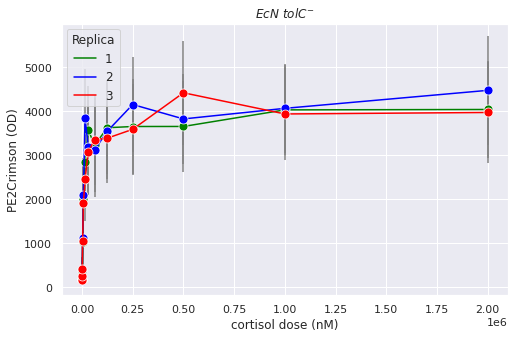

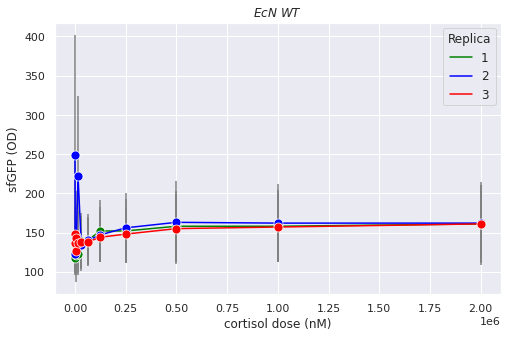

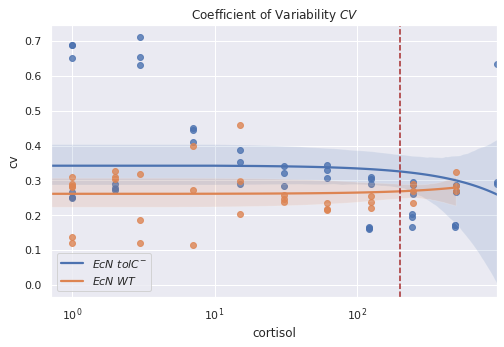

In [31]:
# Add CVs to our dataframes
df_mt = df_mt.assign(cv = ( df_mt["sd"] /         df_mt["median"]).values)
df_mt = df_mt.assign(cv2 = ( df_mt["sd"] / np.sqrt(df_mt["median"])).values)

# Add CVs to our dataframes
df_wt = df_wt.assign(cv = ( df_wt["sd"] /         df_wt["median"]).values)

sns.set(rc={'figure.figsize':(8.0,5.0)})
#plt.figure(figsize=[8, 5])

plot_data(df = df_mt,
          title='$\it{EcN \, \, tolC}^{−}$',
          xlabel='cortisol dose (nM)',
          ylabel='PE2Crimson (OD)')

plot_data(df = df_wt,
          title='$\it{EcN \, \, WT}$',
          xlabel='cortisol dose (nM)',
          ylabel='sfGFP (OD)')

#sns.set(rc={'figure.figsize':(8.0,5.0)})
sns.regplot(x = "cortisol", y = "cv", data=df_mt)
sns.regplot(x = "cortisol", y = "cv", data=df_wt)
plt.axvline(x = 200, color='brown', linestyle='--')
plt.legend(["$\it{EcN \, \, tolC}^{−}$", "$\it{EcN \, \, WT}$"])
plt.title("Coefficient of Variability $CV$")
plt.xscale("log")
plt.show()

Recall that the signal-noise strength can be characterized by the coefficient of variability:

\begin{equation}
CV = \frac{signal (median)}{ noise (SE)}.
\end{equation}

We observe from the bottom panel 

$$CV \approx const$$ 

It reveals an approximately linear relationship between signal and noise magnitudes. However, the uncertainty in the $EcN \, tolC^-$ is high because the blue stripe around the regression constant line is vast. So, let's further explore the signal-noise relationship visually.

# Revisiting Our Problem Setup

After cleaning the original unstructured datasets, we come to relatively small datasets. The small size poses several important questions.

* Q1: Why do we need to study such small datasets using ML and DS approaches?
    
    * A1.1: Because if one cannot analyze and interpret biological signals from a small dataset, how can one trust that one can analyze large (200GB) datasets?
    * A1.2: By analyzing a small dataset, we can easily set the right tools and understand every step of the data processing completed before we move to larger scales.
    * A1.3: Biologists always generate small datasets in their systematic studies and need instant bio-analytics insight into what they've got to steer further efforts in the right direction.
    
* Q2: We have very noisy datasets and do not know how to tune our instruments to obtain cleaner datasets. So, how can we trust and model such noisy data?
    
    * A2.1. All biological datasets are noisy independently of the instrument's quality and precision. By analyzing signal-noise relationships using approaches ML approaches,
    one can detect and estimate different signal-noise fractions coming from the cell processes and the instrument reliably.
    
* Q3: Why do we need to study such a small dataset if all is crystal clear?
    
    * A3.1. This question is naive because we do not know which cellular processes contribute to the signal noise. Indeed, we need to understand whether the entire signal comes from the circuit or other cellular parts contribute to the signal-noise data in the mutant cell.
    
* Q4: But we are interested in a bigger picture to understand how probiotic yogurt can impact overall human performance.

    * A4.1 Yes, we understand this concern and build a pipeline of bioanalytic probabilistic techniques to extend the data analysis onto upper-level scales
        
        * Gut microbiome community
        
        * Gut-Brain Axis

In the series of our jupyter notebooks, we will answer the above questions rigorously.


# Analytical Derivation of Signal-Noise Scaling Laws

Below, we use several statistical visualization techniques to enhance our intuition about noise. We guide our data visualization by completing a simple theoretical analysis with analytical formulas.


## Signal-Noise Scaling Laws for Count Data

Assume that our signal $Y_i$ has a Poisson distribution, that is, $Y_i \sim Poisson(\lambda)$. Here, $Y_i$ is a random variable corresponding to the OD level of the reporter protein. In this case, we obtain 

$$\mu \, = \, \mathbb{E}(Y_i) \, = \, Var(Y_i) \, = \, \lambda.$$ 

Because by definition, $\sigma \, = \, \sqrt{Var(Y_i)}$, we immediately come to ```a square-root type of signal-noise scaling law```,

$$
\sigma \, = \, \sqrt{\mu}.
$$

Interestingly, for the Negative Binomial distribution, $\mathcal{NB}(r, p)$, which generalizes the Poisson distribution, we can obtain the following two cases, depending on the relationship between parameters $r$ and $p$,

$$
\sigma \, = \, a \cdot \sqrt{\mu},
$$

or, 

$$
\sigma \, = \, a \cdot \mu.
$$

## Scaling Laws for Biological Continuous Processes

By definition, random variable $Y_i$ is distributed ```lognormally``` with the corresponding probability density function $f_Y(y)$, 

\begin{equation}\label{eq:lognorm_norm_dists_norm}
f_Y(y) \ = \, \displaystyle \frac{1}{y} \cdot \frac{1}{\sigma_n \sqrt{2 \pi}} \cdot \exp\left(- \frac{1}{2} \left( \frac{\ln y - \mu_n}{\sigma_n} \right)^2  \right),
\end{equation}

if the transformed random variable $X \, = \, \ln Y$ is distributed normally, $X \, \sim \, \mathcal{N}\left(\mu_n, \, \sigma^2_n \right)$, with the density function $f_X(x)$,

\begin{equation}
f_X(x) \ = \, \displaystyle \frac{1}{\sigma_n \sqrt{2 \pi}} \cdot \exp\left(- \frac{1}{2} \left( \frac{x - \mu_n}{\sigma_n} \right)^2  \right)
\end{equation}

Omitting technical algebraic details, we can obtain the following ```linear signal-noise scaling laws```,

\begin{equation}\label{eq:sigma_mean}
\sigma \ = \, \beta_\mu \, \mu,
\end{equation}

\begin{equation}\label{eq:sigma_median}
\sigma \ = \, \beta_\mathcal{M} \, \mathcal{M}.
\end{equation}

Here, $\mathcal{M}$ denotes median. The analytical relationship for the slope $\beta_\mu$ is

\begin{equation}
\beta_\mu \ = \,  \left(\exp\left(\sigma_n^2\right) \, - \, 1 \right)^{1/2}.
\end{equation}

Then, the analytical relationship for the slope $\beta_\mathcal{M}$  is

\begin{equation}
\beta_\mathcal{M} \ = \, \beta_\mu \times  \left(1 + \beta_\mu^2  \right).
\end{equation}

##  Scale-Free Scaling Laws for Instrument's Measurements

In this case, the two parameters $\mu$ and $\sigma$ are independent of one another. Analogously, $\mathcal{M}$ and $\sigma$ are also independent of one another.

## New Feature Engineering by Box-Cox Transformations and Visualization

In [32]:
def plot_noise_signal_data(df = np.nan,
                          title = np.nan, 
                          xlabel = np.nan, 
                          ylabel = np.nan,
                          deg =  1,
                          errorbar=False,
                          sd_2=False,
                          x_pos_1 = np.nan,
                          x_pos_2 = np.nan):
    
    """
    plot_noise_error_data is a function that plots noise-signal
    cleaned data obatined from a raw data file generated by 
    a specific measurement instrument.
    
    Input parameters:
    (1) df - a pandas DataFrame
    (2) title - a plot title
    (3) the meaning of xlabel and ylabel is obvious
    
    Required modules:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.style.use('ggplot')    
    """
        
    plt.margins(0.05)
                
    sns.set(rc={'figure.figsize':(8.0,5.0)})

    
    y = df["median"].to_numpy()
    x = df["sd"].to_numpy()
    if sd_2 == True:
        x = np.power(x, 2)
                
    a1, b1 = np.polyfit(x, y, 1)
    
    # Compute the regression line
    x_fit = np.array([2, np.max(x)])
    y_fit_1 = a1 * x_fit + b1
    plt.plot(x_fit, y_fit_1)
    
    if deg > 1:
        x = df["sd"].to_numpy()
        y = df["median"].to_numpy()
        yerr_bars=df["sd"]
        
        p2 = np.poly1d(  np.polyfit(x, y, deg) )
        _ = plt.plot(x_fit, p2(x_fit))
            

    df_plt = sns.scatterplot(data=df, 
                             x=x, 
                             y="median",
                             hue="replica",
                             marker = 'o',
                             s = 50,
                             palette=['green','blue','red'])                    
            
    if errorbar == True:
        yerr_bars=df["sd"]
        plt.errorbar(x=x,
                     y=df["median"],
                     yerr=yerr_bars,
                     fmt='none', 
                     color = "gray",
                     alpha=0.5)
        
    if x_pos_1 != np.nan:
        plt.vlines(x_pos_1, 0, 6000, color = "brown", alpha=0.5, linestyles='dashed')
        plt.vlines(x_pos_2, 0, 6000, color = "brown", alpha=0.5, linestyles='dashed')
    
    #df_plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0).set_title("Replica")
    df_plt.legend(loc=2).set_title("Replica")
    
    plt.setp(df_plt.get_legend().get_texts(), fontsize='12')
    plt.setp(df_plt.get_legend().get_title(), fontsize='12')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.show()
    
    return a1, b1 
    
print('The function to visualize noise-signal relationship in the cortisol data has been defined.')    

The function to visualize noise-signal relationship in the cortisol data has been defined.


/home/evgeni/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


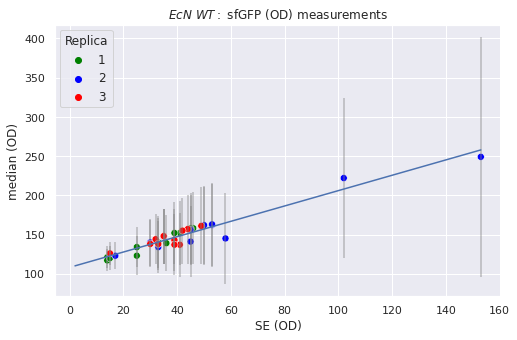

/home/evgeni/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


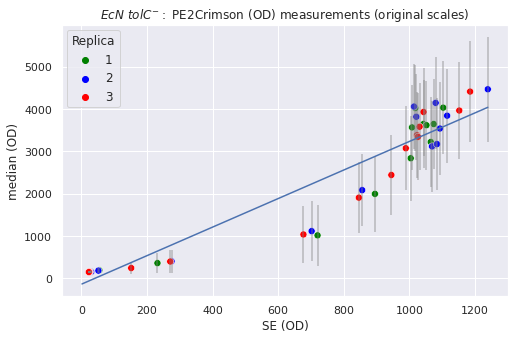

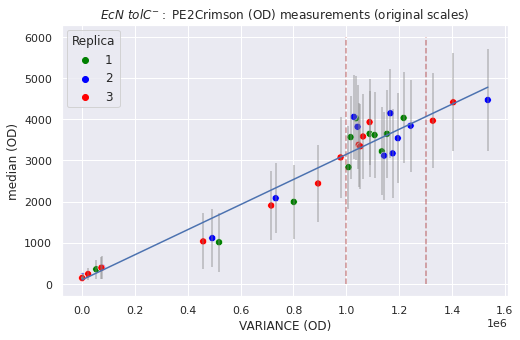

intercept, slope:
 108.099    0.979
-142.930    3.376
  99.022    3.048e-03


In [33]:
title_mt = '$\it{EcN \, \, tolC}^{−}:$ PE2Crimson (OD) measurements (original scales)'
title_wt ='$\it{EcN \, \, WT}:$ sfGFP (OD) measurements'

a1_wt, b1_wt = plot_noise_signal_data(df_wt,
                       title=title_wt,
                       xlabel='SE (OD)',
                       ylabel='median (OD)',
                       errorbar=True)

a1_mt, b1_mt = plot_noise_signal_data(df_mt,
                       title=title_mt,
                       xlabel='SE (OD)',
                       ylabel='median (OD)',
                       errorbar=True)

df_mt_2 = df_mt.copy()
df_mt_2.loc[:,"sd_2"] = df_mt.loc[:,"sd"].pow(2)

a1_mt_2, b1_mt_2 = plot_noise_signal_data(df = df_mt_2,
                                          title=title_mt,
                                          xlabel='VARIANCE (OD)',
                                          ylabel='median (OD)',
                                          errorbar=True,
                                          sd_2=True,
                                          x_pos_1= 1.0*10**6,
                                          x_pos_2= 1.3*10**6)

print("intercept, slope:")
print(' {0:0.3f}    {1:0.3f}'.format(b1_wt, a1_wt))
print('{0:0.3f}    {1:0.3f}'.format(b1_mt, a1_mt))
print('  {0:0.3f}    {1:0.3e}'.format(b1_mt_2, a1_mt_2))

We see that our regression approximates the transformed data within the standard error (bottom panel) while it does not approximate the original data (middle panel). This observation further confirms our hypothesis and motivates us to conduct a targeted regression to analyze the noise distributions more rigorously.

__Negtive Binomial Distribution__: We find the slope for the bottom panel $\text{3.048e-03} \ll 1$, and hence, this count distribution cannot be described by a Poisson Distribution. It follows that TXTL processes cannot be described by the average number of successful transcription events per time unit. Mathematically, the second parameter is needed to account for the slope. In all such situations, the Negative Binomial distribution, $\mathcal{NB}(r, p)$, generalizes the Poisson distribution. Here, we interpret $r$ as the average number of transcription failures until the transcription completes. We also view $p$ at the probability of a successful transcription event.

## Generalized Errors-in-Variables Models

To get a deeper insight into the signal-noise statistical properties, we next formulate three statistical models:

### Model #1: Signal-Noise Linear Scaling Law

$$
\begin{cases}
\begin{align}
M_{k,j} & = \, \beta_{0} \, + \, \beta_{1}\cdot s_{k,j}^{*} \, + \, \varepsilon_{k,j}, \, \, \, k \, = \, 1, \ldots, N, \, \, \, j \, = \, 1, 2 , 3
\\
&
\\
s_{k,j} & = \, s_{k,j}^{*} \, + \, \eta_{k, j}
\end{align}
\end{cases}
$$

### Model #2: Signal-Noise Non-Linear Scaling Law


$$
\begin{cases}
\begin{align}
M_{k,j} & = \, \beta_{2}\cdot \left( s_{k,j}^{*} \right)^2 \, + \, \varepsilon_{k,j}, \, \, \, k \, = \, 1, \ldots, N, \, \, \, j \, = \, 1, 2 , 3
\\
&
\\
s_{k,j} & = \, s_{k,j}^{*} \, + \, \eta_{k, j}
\end{align}
\end{cases}
$$

### Model #3: Signal-Noise Mixture Scaling Law


$$
\begin{cases}
\begin{align}
M_{k,j} & = \, \underbrace{ \beta_{0} \, + \, \beta_{1}\cdot s_{k,j}^{*}}_{\text{Normal and Log-Normal Components}\atop 
\text{from Cytoplasm and Environment}} \, + \, \underbrace{\beta_{2}\cdot \left( s_{k,j}^{*} \right)^2}_{\text{Negative Binomial Component}\atop \text{from TXTL processes}}   \, + \, \, \varepsilon_{k,j}, \, \, \, k \, = \, 1, \ldots, N, \, \, \, j \, = \, 1, 2 , 
\\
&
\\
s_{k,j} & = \, s_{k,j}^{*} \, + \, \eta_{k, j}
\end{align}
\end{cases}
$$

## Model's Doman of Validity is Defined by Statistical Properties of Both Regressor and Observable Variables

For large samples, both sampling distributions for sample median and sample standard deviation are approaximately normal, $N_{sample} > 25$. Othervise, the distributions are positevely skewed.


### Sampling Distribution of Medians from Large Samples is Known (Laplace, 1818)

Let $f_k(y)$ be the (unknown) density function for a population of measured readout variable, that is, $y_{k,j} \, \sim \, f_k(y)$, where $y_{k,j}$ is the level of E2Crimson (OD) or sfGFP (OD), see above. Then, the sample median from the population is asymptotically normal 

$$M_{k,j} \, \sim \, \mathcal{N}(m_k, s_k) \quad \text{and} \quad \varepsilon_{k,j} \, \sim \, \mathcal{N}(0, s_k)  $$

with the median sample standard deviation $s_M$ given by

$$s_{m_k} \, = \, \frac{1}{4\cdot N_{sample}  \cdot f(m_k)^2}$$


In the above formulae, the unknown density function $f(y)$ should be inferred from the data based on our signal-noise mixture distirbution hypothesis formulated and discussed earlier:

$$f(\cdot, \cdot) \approx \omega_0 \, \delta_0(y)  +  \omega_1 \, \mathcal{LN}(\cdot, \cdot)  +  \omega_2 \, \mathcal{N}(\cdot, \cdot), \, \\ \omega_0  +  \omega_1  + \omega_2  =  1  \, \left(EcN \, WT\right)$$

or 

$$f(\cdot, \cdot) \approx \omega_0 \, \delta_0(y)  +  \omega_1 \mathcal{NB}(\cdot, \cdot)  +   \omega_2 \mathcal{LN}(\cdot, \cdot)  +  \omega_3 \mathcal{N}(\cdot, \cdot), \\ \omega_0  +  \omega_1  +  \omega_2  +  \omega_3  =  1  \, \left( EcN \,  tolC^-\right)$$

Here, $\delta_0(y)$ is the Dirac delta function, $\mathcal{NB}(\cdot, \cdot)$, $\mathcal{LN}(\cdot, \cdot)$, and $\mathcal{N}(\cdot, \cdot)$ are Negative Binomial, Log-Normal, and Normal density functions, respectively. Notation $(\cdot, \cdot)$ means a pair of unknown distribution parameters to be inferred from our Bayesian approaches that we develop and use in the next notebook.

### An Example of a Zero-Inflated Poisson Distribution

* <font color='red'> We use $\delta_0(y)$ to describe zero-inflated degenerate distribution at zero, which corresponds to the population of cells where the genetic circuit is not `activated`. </font>

$$f(\cdot) \approx 0.2 \times \, \delta_0(y) \,  + \,  0.8 \times \mathcal{Poisson}(\lambda), \quad \lambda \,  = \, 4$$


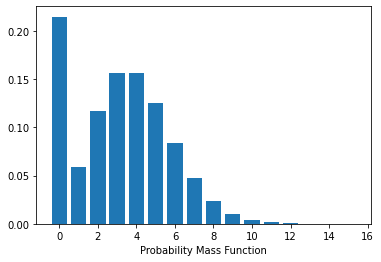

In [12]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 15, 16)
y = poisson.pmf(x, 4)

z = np.multiply(0.2, ([1] + np.repeat(0, len(x)-1).tolist() )) + (1 - 0.2) * y
plt.bar(x, z)
plt.xlabel("x")
plt.xlabel("Probability Mass Function")
plt.show()

### Sampling Distribution of Standard Errors for Medians is Unknown

In the next notebook, we develop a Bayesian approach to generate a sampling distribution of standard errors for sample medians. We will use default weak priors to validate the sensitivity of the sampling distribution. These Bayesian inference procedures can be viewed as a generalization of bootstrap sampling, and the latter does not apply to our sparse data.

# Conclusions

- In this EDA, we have rigorously analyzed different sources of noise in experimental datasets, both analytically and computationally

- We also showed that by "_fitting_" signal-noise patterns, we could detect and classify various fractions of signal and their origin in the TXTL circuit, cell cytoplasm, or instrument.

- Although Frequentist Statistics' Likelihood Estimators (MLE) can be developed for Mixture Models, Bayesian inference is more appropriate to fit the corresponding statistical distributions. It will be implemented in our next notebook study.

- Importantly, a completely novel type of ML feature is introduced, which is noise distribution by which a specific type of biological signal can be detected and predicted. Namely, we can now use a count type of statistical distribution such as Negative-Binomial to characterize transcription-translation processes. In contrast, log-normal distributions can be used to describe other cellular processes. Furthermore, we can use the new statistically distributed feature as a novel type of `biomarkers` in molecular systems bioinformatics research. 

- Finally, we developed a general parser of the instrument's standard output protocols. Therefore, after the code is packed in a Python module, the analysis can be run autonomously in the wet lab.

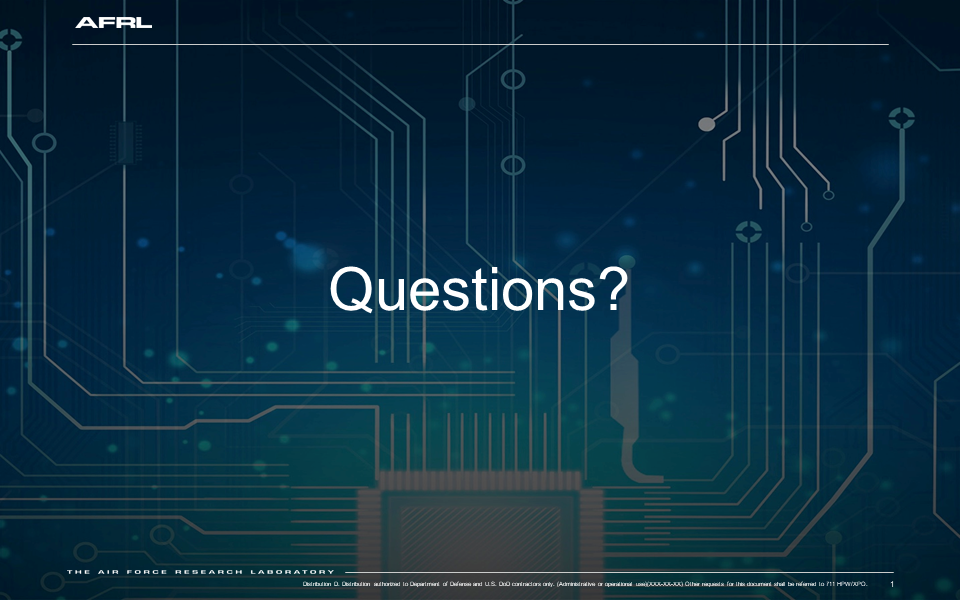

In [38]:
Image("questions.png")